In [ ]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Close"])
    preds=model.predict(test[predictors])
    preds= pd.Series(preds, index=test.index,name="Predictions")
    combined=pd.concat([test["Close"],preds],axis=1)
    return combined

In [ ]:
def backtest(data,model,predictors,start=500,step=50):
    all_predictions=[]
    for i in range(start,data.shape[0],step):
        train=data.iloc[0:i].copy()
        test=data.iloc[i:(i+step)].copy()
        predictions=predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [ ]:
preds=backtest(data,model,predictors,100,10)

In [ ]:
from sklearn import metrics
import numpy as np

print("Mean Absolute Error with Backtest:", round(metrics.mean_absolute_error(preds["Close"],preds["Predictions"]), 4))
print("Mean Squared Error with Backtest:", round(metrics.mean_squared_error(preds["Close"],preds["Predictions"]), 4))
print("Root Mean Squared Error with Backtest:", round(np.sqrt(metrics.mean_squared_error(preds["Close"],preds["Predictions"])), 4))
errors = abs(preds["Close"]-preds["Predictions"])
mape = 100 * (errors / preds["Close"])
accuracy = 100 - np.mean(mape)
print('Accuracy with Backtest:', round(accuracy, 2), '%.') 

Mean Absolute Error with Backtest: 14.1196
Mean Squared Error with Backtest: 507.1741
Root Mean Squared Error with Backtest: 22.5205
Accuracy with Backtest: 99.46 %.


<AxesSubplot:xlabel='Date'>

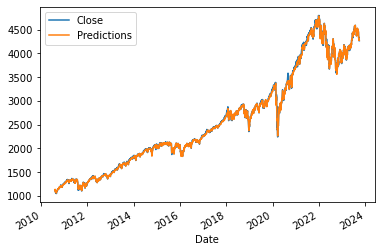

In [ ]:
preds.plot()

In [ ]:
preds['residuals'] = preds['Close'] - preds['Predictions']

high_risk_threshold =15
moderate_risk_threshold = 20
low_risk_threshold = 10

def categorize_risk(residual):
    if abs(residual) > high_risk_threshold:
        return 'Very Risky'
    elif abs(residual) > moderate_risk_threshold:
        return 'Risky'
    elif abs(residual) > low_risk_threshold:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

preds['Risk Level'] = preds['residuals'].apply(categorize_risk)

preds

,Close,Predictions,residuals,Risk Level
Date,,,,
2010-08-06,1121.640015,1118.178493,3.461522,Low Risk
2010-08-09,1127.790039,1134.124010,-6.333971,Low Risk
2010-08-10,1121.060059,1122.050932,-0.990873,Low Risk
2010-08-11,1089.469971,1103.570925,-14.100955,Moderate Risk
2010-08-12,1083.609985,1085.352795,-1.742810,Low Risk
...,...,...,...,...
2023-09-26,4273.529785,4283.515178,-9.985393,Low Risk
2023-09-27,4274.509766,4272.117615,2.392151,Low Risk
2023-09-28,4299.700195,4299.589468,0.110728,Low Risk
